# Reference Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from patsy import dmatrices
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
import sys
sys.path.append('../..')
from household_contact_tracing.utilities import estimate_growth_rates
sns.set()

We generate reference data by simulating the epidemic with no contact tracing. Through this, we can gain an understanding of how well contact tracing is able to control the epidemic in terms of a growth rate reduction.

This is done using the simulation script - "Simulate_growth_rates_no_tracing.py"

In [15]:
# Import the data
reference_data = pd.read_excel("../../Data/Reference/growth_rates_no_tracing.xlsx", index_col = 0)
#reference_data = pd.read_excel("/Users/LizFearon/Documents/work/household-contact-tracing/Data/Reference/growth_rates_no_tracing_IDP0.15_0.25.xlsx", index_col = 0)



In [16]:
reference_data

,infection_reporting_prob,global_contact_reduction,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,0.15,0.000000,5000,5008,5355,6382,8404,11488,15436,20032,...,41378,52414,66093,83161,104627,131273,164502,205530,257218,321615
1,0.20,0.000000,5000,5015,5318,6454,8478,11578,15566,20336,...,42239,53455,67502,85092,106740,134008,167859,210270,262857,328094
2,0.25,0.000000,5000,5015,5349,6469,8658,11720,15652,20408,...,41976,53035,66999,84231,105854,132578,166303,207824,259615,324621
3,0.15,0.018367,5000,5014,5341,6386,8474,11407,15401,20111,...,40855,51527,64869,81374,101805,127190,158566,197872,246194,306284
4,0.20,0.018367,5000,5011,5301,6369,8392,11444,15266,19868,...,40668,51431,64683,81156,101644,127006,158678,197977,246689,307252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.20,0.881633,5000,5004,5085,5359,5884,6582,7399,8088,...,9657,10072,10506,10871,11196,11477,11712,11950,12167,12371
146,0.25,0.881633,5000,5005,5081,5365,5919,6641,7375,8127,...,9625,10011,10413,10747,11046,11306,11534,11757,11940,12091
147,0.15,0.900000,5000,5002,5089,5343,5778,6409,7203,7880,...,9361,9717,10085,10418,10704,10945,11179,11388,11571,11742
148,0.20,0.900000,5000,5005,5087,5338,5819,6489,7248,7895,...,9203,9542,9875,10153,10406,10624,10801,10974,11125,11254


In [17]:
reference_data = estimate_growth_rates(reference_data)

current fit; 149

Text(0, 0.5, 'Frequency')

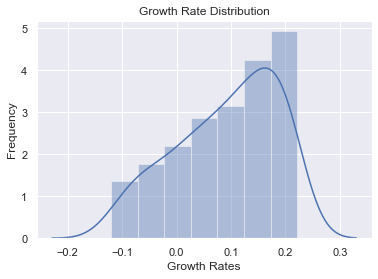

In [18]:
sns.distplot(reference_data["growth_rate"])
plt.title("Growth Rate Distribution")
plt.xlabel("Growth Rates")
plt.ylabel("Frequency")

In [19]:
results = reference_data[["global_contact_reduction", "infection_reporting_prob"]]

In [20]:
results["growth_rate"] = pd.Series(reference_data["growth_rate"])

Create a data table of the observed growth rate and 

In [21]:
results

,global_contact_reduction,infection_reporting_prob,growth_rate
0,0.000000,0.15,0.221242
1,0.000000,0.20,0.220272
2,0.000000,0.25,0.220604
3,0.018367,0.15,0.216149
4,0.018367,0.20,0.217126
...,...,...,...
145,0.881633,0.20,-0.092993
146,0.881633,0.25,-0.110605
147,0.900000,0.15,-0.103584
148,0.900000,0.20,-0.119599


In [23]:
def growth_rate_to_doubling_time(growth_rates):
    return np.sign(growth_rates) * (np.log(2) / (np.sign(growth_rates) * growth_rates))

def doubling_time_to_growth_rate(doubling_times):
    return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))

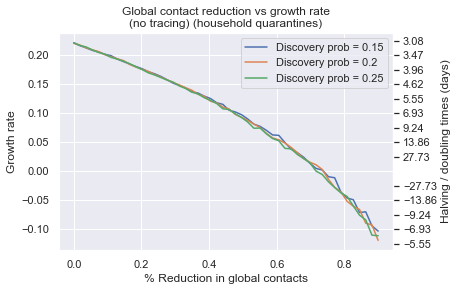

In [24]:
fig, ax = plt.subplots()

y_vals = np.linspace(-0.15, 0.25, 17)
y_vals = np.concatenate((y_vals[:6], y_vals[7:]))

for infection_report_value in [0.1, 0.2, 0.3, 0.4, 0.5]:
#for infection_report_value in [0.15, 0.2, 0.25]:


    subset = results[results["infection_reporting_prob"] == infection_report_value]
    
    plt.plot("global_contact_reduction", "growth_rate", data = subset)

ax2 = ax.secondary_yaxis("right", functions=(growth_rate_to_doubling_time, doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(y_vals), minor = False)

plt.legend(["Discovery prob = 0.1",
           "Discovery prob = 0.2",
           "Discovery prob = 0.3",
           "Discovery prob = 0.4",
           "Discovery prob = 0.5"])

#plt.legend(["Discovery prob = 0.15",
#           "Discovery prob = 0.2",
#           "Discovery prob = 0.25"])

plt.ylabel("Growth rate")
plt.xlabel("% Reduction in global contacts")
plt.title("Global contact reduction vs growth rate\n(no tracing) (household quarantines)")
ax2.set_ylabel("Halving / doubling times (days)")
plt.savefig("../../Figures/Reference Data/reference_curve.svg")
#plt.savefig("../../Figures/Reference Data/reference_curve_IDP_0.15_0.25.svg")
#plt.savefig("../../Figures/Reference Data/reference_curve_IDP_0.15_0.25.pdf")

There's some pretty clear heteroscedasticity in the results. We estimate the mean growth rate using robust linear regression to cope with it (I tried iteratively reweighted least squares but can't figure it out at the moment).

In [25]:
y, X = dmatrices('growth_rate ~ global_contact_reduction + I(global_contact_reduction**2) + I(global_contact_reduction**3)',
                 data = results)

#y, X = dmatrices('growth_rate ~ global_contact_reduction + I(global_contact_reduction**2) + I(global_contact_reduction**3) + I(global_contact_reduction**4)',
#                 data = results)                 
model = sma.RLM(y, X)
res = model.fit()
print(res.summary())
#sm.graphics.regressionplots.plot_fit(res, "global_contact_reduction")

Robust linear Model Regression Results                    
Dep. Variable:            growth_rate   No. Observations:                  150
Model:                            RLM   Df Residuals:                      146
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 18 Aug 2020                                         
Time:                        14:53:55                                         
No. Iterations:                    31                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                   

Text(0, 0.5, 'Residual')

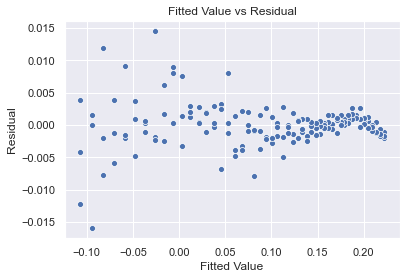

In [26]:
sns.scatterplot(res.fittedvalues, res.resid)
plt.title("Fitted Value vs Residual")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")

In [29]:
# Check model fits with and without quartic terms using AIC

#y, X = dmatrices('growth_rate ~ global_contact_reduction + I(global_contact_reduction**2) + I(global_contact_reduction**3) + I(global_contact_reduction**4)',
#                 data = results)  
# AIC = -1288


#y, X = dmatrices('growth_rate ~ global_contact_reduction + I(global_contact_reduction**2) + I(global_contact_reduction**3)',
#                 data = results)  
# AIC = -1269                 

#model = sma.OLS(y, X)
#res = model.fit()
#print(res.summary())




OLS Regression Results                            
Dep. Variable:            growth_rate   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.078e+04
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          2.99e-211
Time:                        14:55:57   Log-Likelihood:                 649.11
No. Observations:                 150   AIC:                            -1288.
Df Residuals:                     145   BIC:                            -1273.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           

In [13]:
df = pd.DataFrame([res.params], columns = ["intercept", "coef_contact_reduction", "coef_contact_reduction**2", "coef_contact_reduction**3"])

#df = pd.DataFrame([res.params], columns = ["intercept", "coef_contact_reduction", "coef_contact_reduction**2", "coef_contact_reduction**3", "coef_contact_reduction**4"])

We export the OLS coefficients so that the reference curve can be drawn in other notebooks.

In [14]:
df.to_excel("../../Data/Reference/OLS_coefficients.xlsx")
#df.to_excel("../../Data/Reference/OLS_coefficients_IDP_0.15_0.25.xlsx")